<a id="top"></a>
# Exploratory Data Analysis (EDA)
---


## 1. Introduction <a id="introduction"></a>

### Dataset Overview – Bank Marketing Campaign

**Source:** [UCI Machine Learning Repository – Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing)  
Collected from direct marketing campaigns of a Portuguese bank.  

- **Rows:** ~45,211 (clients contacted)  
- **Features:** 17 input variables + 1 target  

---

### Features

**🔹 Client Information**
- **age** → Client’s age  
- **job** → Type of job (admin, technician, management, worker, etc.)  
- **marital** → Marital status (married, single, divorced)  
- **education** → Education level  
- **default** → Has credit in default? (yes/no)  
- **housing** → Has housing loan? (yes/no)  
- **loan** → Has personal loan? (yes/no)  

**🔹 Campaign-related Information**
- **contact** → Type of communication (cellular, telephone)  
- **month** → Last contact month  
- **day_of_week** → Last contact day  
- **duration** → Last contact duration (in seconds)  
- **campaign** → Number of contacts during this campaign  
- **pdays** → Days since last contact in a previous campaign (`-1` = not contacted)  
- **previous** → Number of contacts before this campaign  
- **poutcome** → Outcome of previous marketing campaign  

**🔹 Target Variable**
- **y** → Did the client subscribe to a term deposit? (yes / no)  

---

### Data Understanding & EDA
- Check **class imbalance** in the target (≈90% “no”).  
- Explore **categorical distributions** (e.g., job, education, marital).  
- Generate **correlation heatmap** for numeric features.  
- Perform **feature-target analysis** (e.g., impact of `duration` on subscription rate).  

[↑ Back to top](#top)

---

## 2. Data Overview <a id="data-overview"></a>
- Show first rows (`df.head()`).
- Shape of the dataset (`df.shape`).
- Column names and types (`df.info()`).

[↑ Back to top](#top)
---

In [32]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset
df = pd.read_csv("F:/Ironhack/ML_Project/data/bank-full.csv", sep=";")

# displaying the first few rows of the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
# checking the shape of the dataframe
df.shape

(45211, 17)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 3. Descriptive Statistics <a id="descriptive-statistics"></a>
- Summary statistics (`df.describe()`).
- Distribution of categorical variables.
- Univariate analysis (histograms, barplots).

[↑ Back to top](#top)
---

In [36]:
# getting summary statistics of the dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Text(0.5, 1.0, 'Distribution of Target Variable')

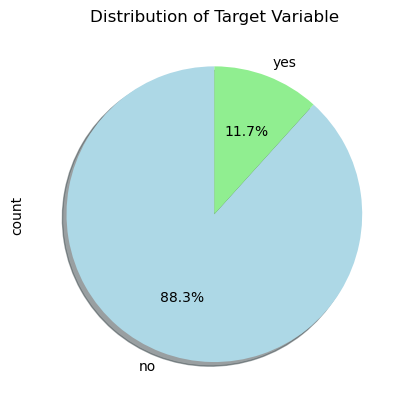

In [37]:
# pie chart of the target variable
df['y'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90, shadow=True)
plt.title('Distribution of Target Variable')    


### Client Information

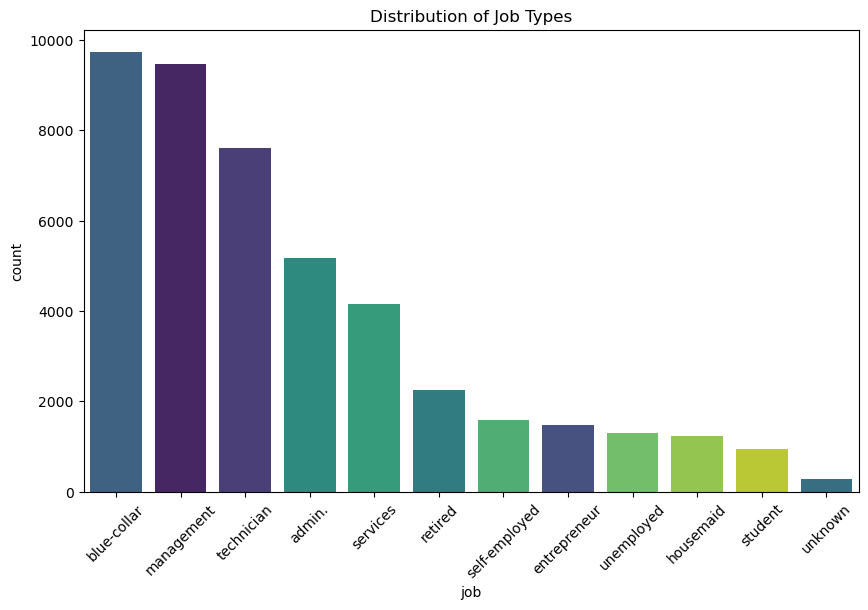

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64


In [38]:
# bar chart of job types
plt.figure(figsize=(10,6)) 
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='viridis', hue='job')
plt.title('Distribution of Job Types')
plt.xticks(rotation=45)
plt.show()

print(df['job'].value_counts(normalize=True) * 100)

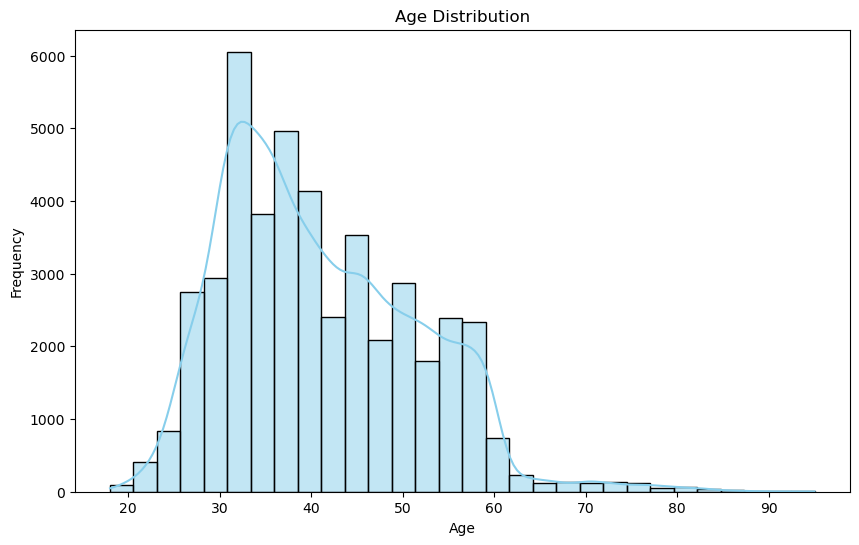

In [39]:

# distribution of age
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

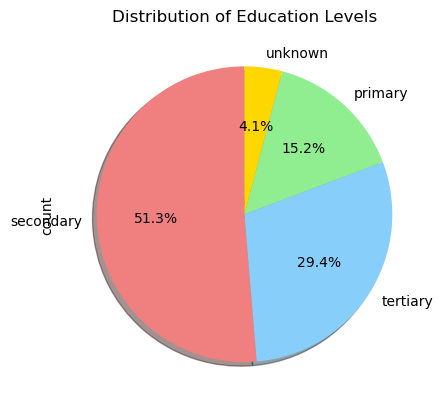

In [40]:
# pie chart of the education levels
df['education'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'], startangle=90, shadow=True)
plt.title('Distribution of Education Levels')
plt.show()

In [41]:
print(df['education'].value_counts(normalize=True) * 100)

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64


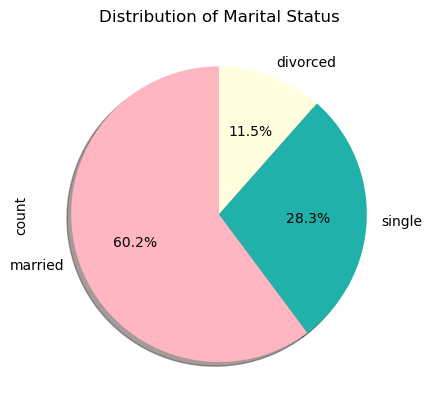

In [42]:
#pie chart of the marital status
df['marital'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightpink', 'lightseagreen', 'lightyellow'], startangle=90, shadow=True)
plt.title('Distribution of Marital Status')
plt.show()

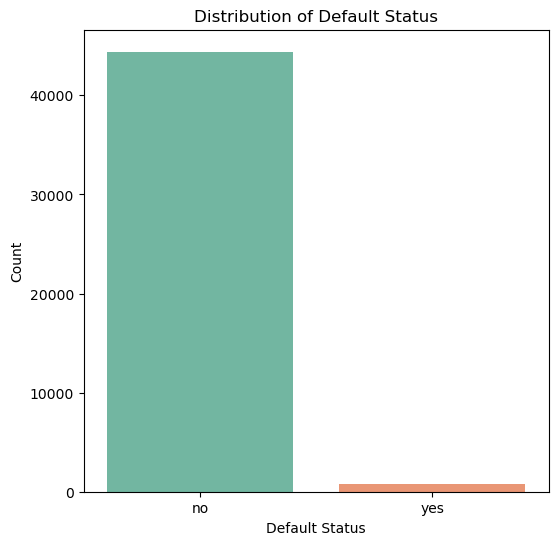

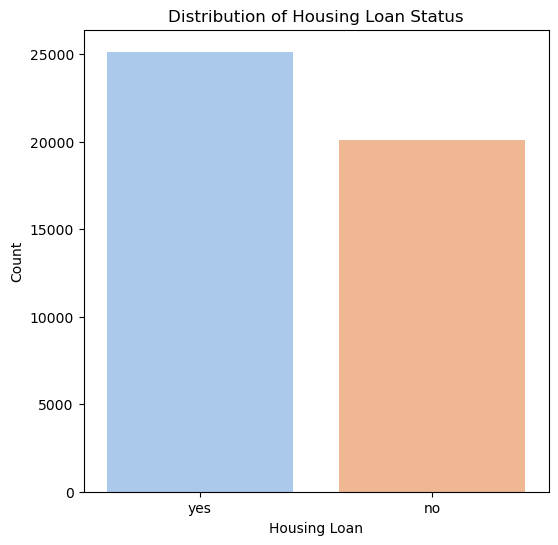

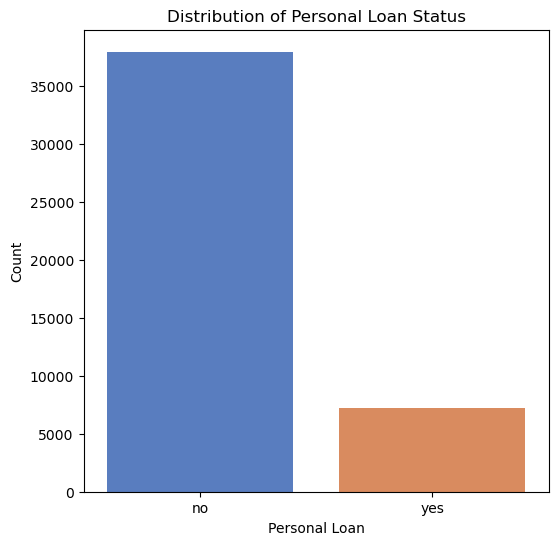

In [43]:
# bar chart of the default status
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='default', palette='Set2', hue='default')
plt.title('Distribution of Default Status')    
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

# bar chart of housing loan status
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='housing', palette='pastel', hue='housing')
plt.title('Distribution of Housing Loan Status')    
plt.xlabel('Housing Loan')
plt.ylabel('Count')

# bar chart of personal loan status
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='loan', palette='muted', hue='loan')
plt.title('Distribution of Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

### Campaign-related Information

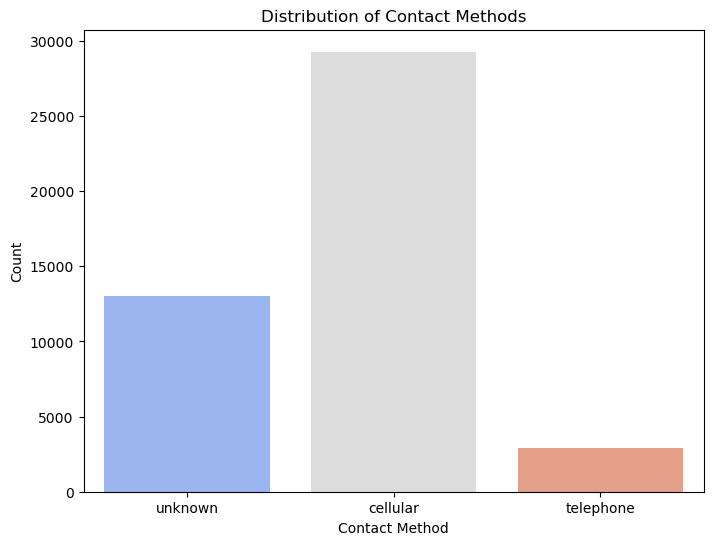

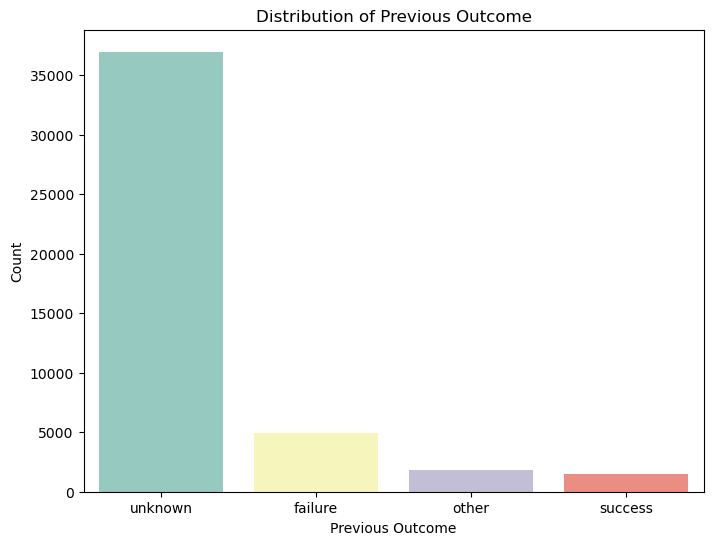

In [44]:

#contact method distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='contact', palette='coolwarm', hue='contact')
plt.title('Distribution of Contact Methods')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()

#poutcome distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='poutcome', palette='Set3', hue='poutcome')
plt.title('Distribution of Previous Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()



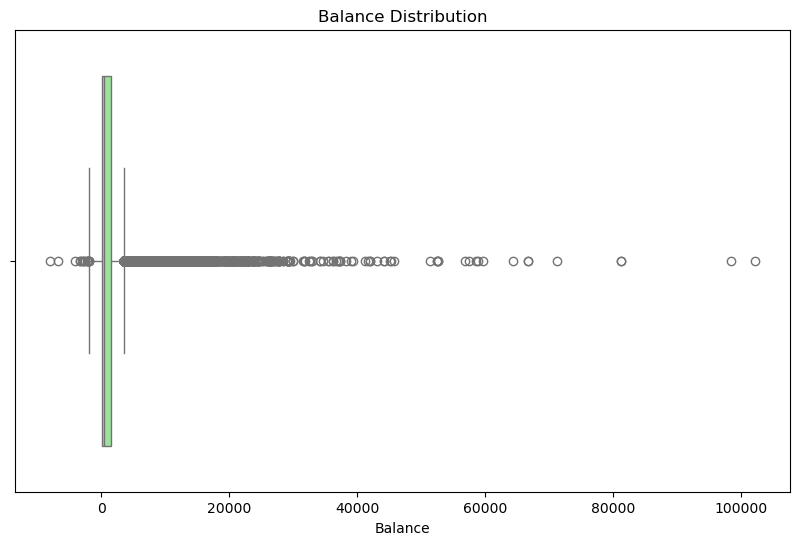

In [45]:
# balance distribution
plt.figure(figsize=(10,6))
sns.boxplot(x=df['balance'], color='lightgreen')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.show()

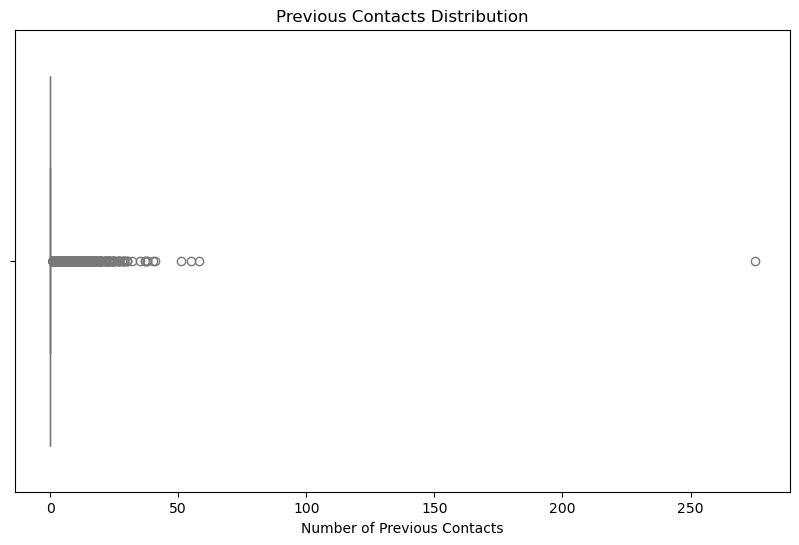

In [46]:
#previous boxplot 
plt.figure(figsize=(10,6))
sns.boxplot(x=df['previous'], color='lightblue')
plt.title('Previous Contacts Distribution')
plt.xlabel('Number of Previous Contacts')
plt.show()


In [47]:
# handling outliers in 'precious' column
upper_cap = df['previous'].quantile(0.99)
df['previous'] = np.where(df['previous'] > upper_cap, upper_cap, df['previous'])


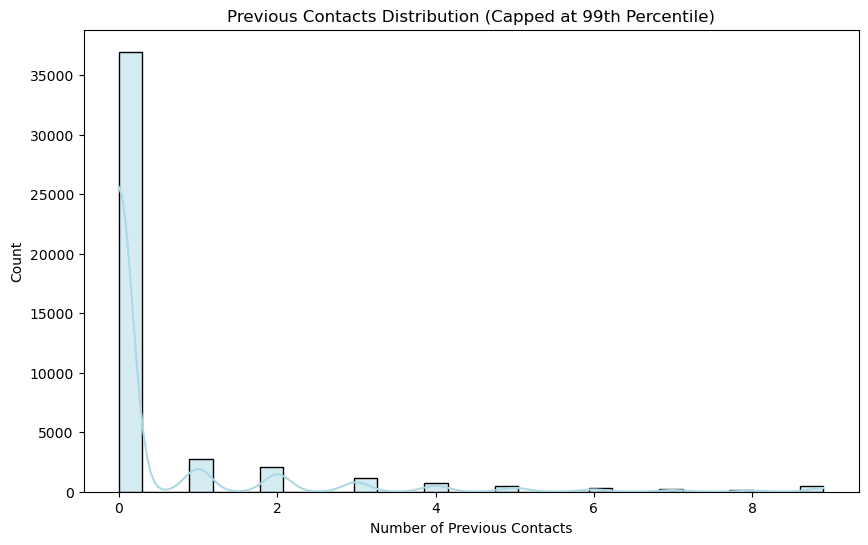

In [48]:
#previous barplot without outliers
plt.figure(figsize=(10,6))
sns.histplot(df['previous'], bins=30, kde=True, color='lightblue')
plt.title('Previous Contacts Distribution (Capped at 99th Percentile)')
plt.xlabel('Number of Previous Contacts')
plt.show()



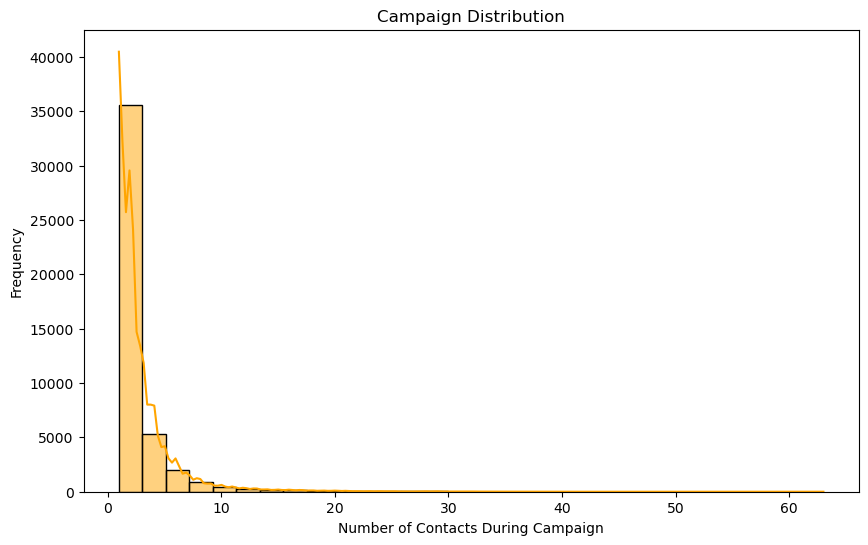

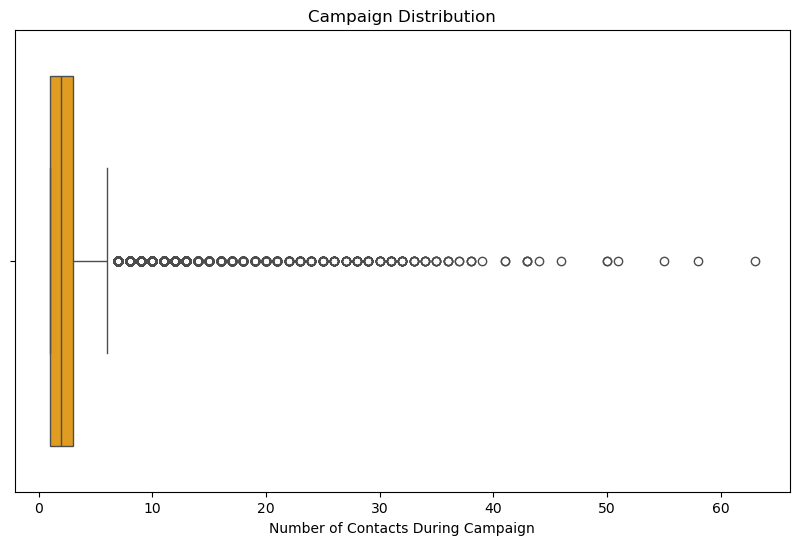

In [49]:
#campaign distribution
plt.figure(figsize=(10,6))
sns.histplot(df['campaign'], bins=30, kde=True, color='orange')
plt.title('Campaign Distribution')
plt.xlabel('Number of Contacts During Campaign')
plt.ylabel('Frequency')
plt.show()

#campaign boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['campaign'], color='orange')
plt.title('Campaign Distribution')
plt.xlabel('Number of Contacts During Campaign')
plt.show()

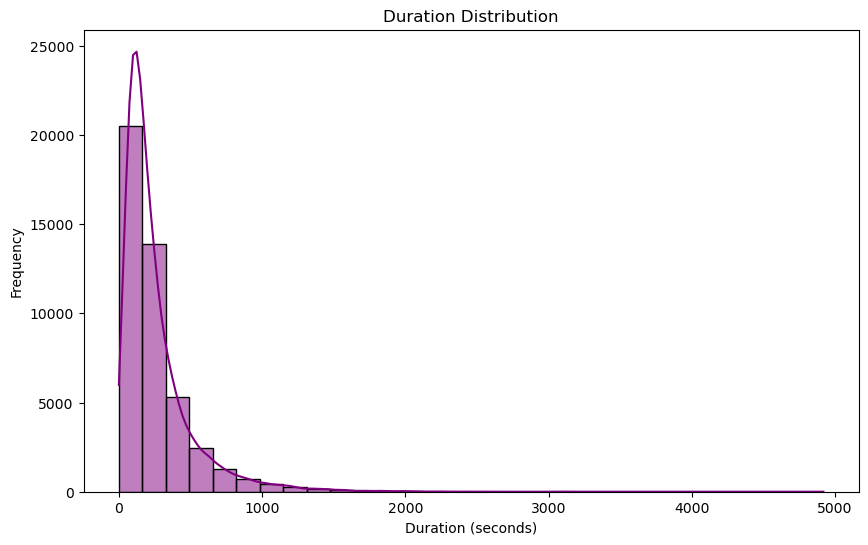

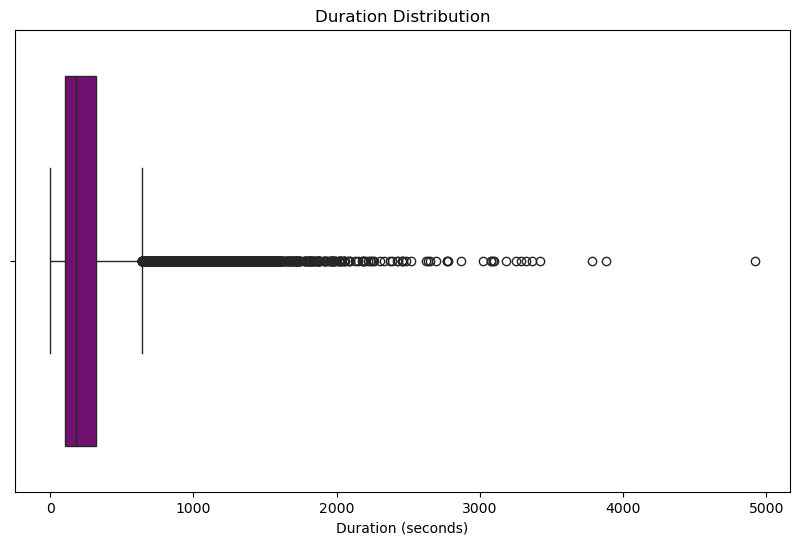

In [50]:
#duration distribution
plt.figure(figsize=(10,6))
sns.histplot(df['duration'], bins=30, kde=True, color='purple')
plt.title('Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

#duration boxplot
plt.figure(figsize=(10,6))  
sns.boxplot(x=df['duration'], color='purple')
plt.title('Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.show()

In [51]:
# Summary of EDA findings
# - The target variable 'y' is imbalanced with a higher proportion of 'no' responses.
# - The most common job types are 'blue-collar', 'management', and 'technician'.
# - The age distribution is right-skewed with a mean age around 40 years.
# - Education levels are varied, with 'secondary' being the most common.
# - Most individuals are married, followed by single and divorced.
# - The majority do not have default, housing, or personal loans.
# - The most common contact method is 'cellular'.
# - Previous campaign outcomes are mostly 'unknown', followed by 'failure' and 'success'.
# - The balance distribution shows a wide range of values with some outliers.
# - The number of contacts during the campaign varies, with most individuals being contacted a few times.


## 4. Feature Engineering <a id="feature-engineering"></a>
 1. Campaign Interaction Features:
    - Contact Intensity
    - Has Been Contacted Before
    - Time Since Last Contact Category
 2. Client Profile Features:
    - Age Grouping
    - Has Any Loan
    - Financial Standing
 3. Campaign Timing Features:
    - Month Category (Seasonality)
    - Weekend Contact Flag

[↑ Back to top](#top)
---

### Campaign Interaction Features

In [53]:
#contact intensity

df['total_contacts'] = df['campaign'] + df['previous']


In [54]:
# have been contacted before?

df['has_previous_contact'] = (df['previous'] > 0).astype(int)

In [55]:
# days since last contact category

df['pdays_category'] = pd.cut(df['pdays'],
                              bins=[-1, 0, 5, 30, 999],
                              labels=['no_previous', 'recent', 'month', 'long_ago'])


###  Client Profile Features

In [56]:
# age group
df['age_group'] = pd.cut(df['age'],
                         bins=[17, 25, 35, 50, 65, 99],
                         labels=['18-25', '26-35', '36-50', '51-65', '65+'])


### Campaign Timing Features

## 5. Correlation Analysis <a id="correlation-analysis"></a>
- Correlation heatmap (numeric variables).
- Encoded heatmap (categorical variables with one-hot encoding).
- Key insights from correlations.

[↑ Back to top](#top)
---

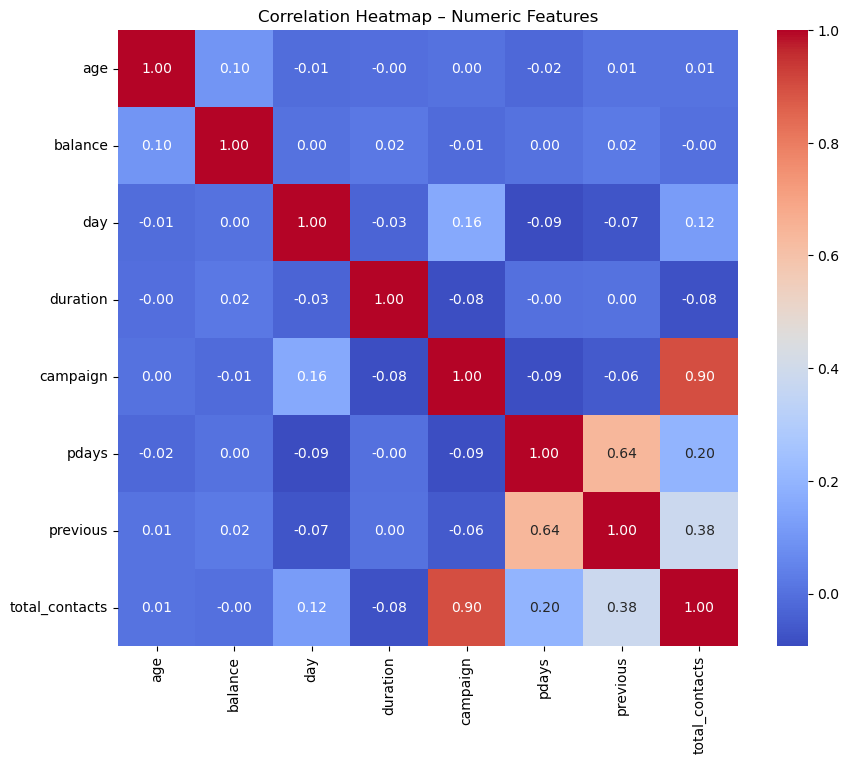

In [57]:


# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap – Numeric Features')
plt.show()



In [58]:
# Create a numeric copy of target
df['y_num'] = df['y'].map({'yes': 1, 'no': 0})

# Correlation of numeric features with target
corr_target = df[num_cols.columns.tolist() + ['y_num']].corr()['y_num'].sort_values(ascending=False)
print(corr_target)


y_num             1.000000
duration          0.394521
previous          0.141835
pdays             0.103621
balance           0.052838
age               0.025155
total_contacts   -0.005949
day              -0.028348
campaign         -0.073172
Name: y_num, dtype: float64


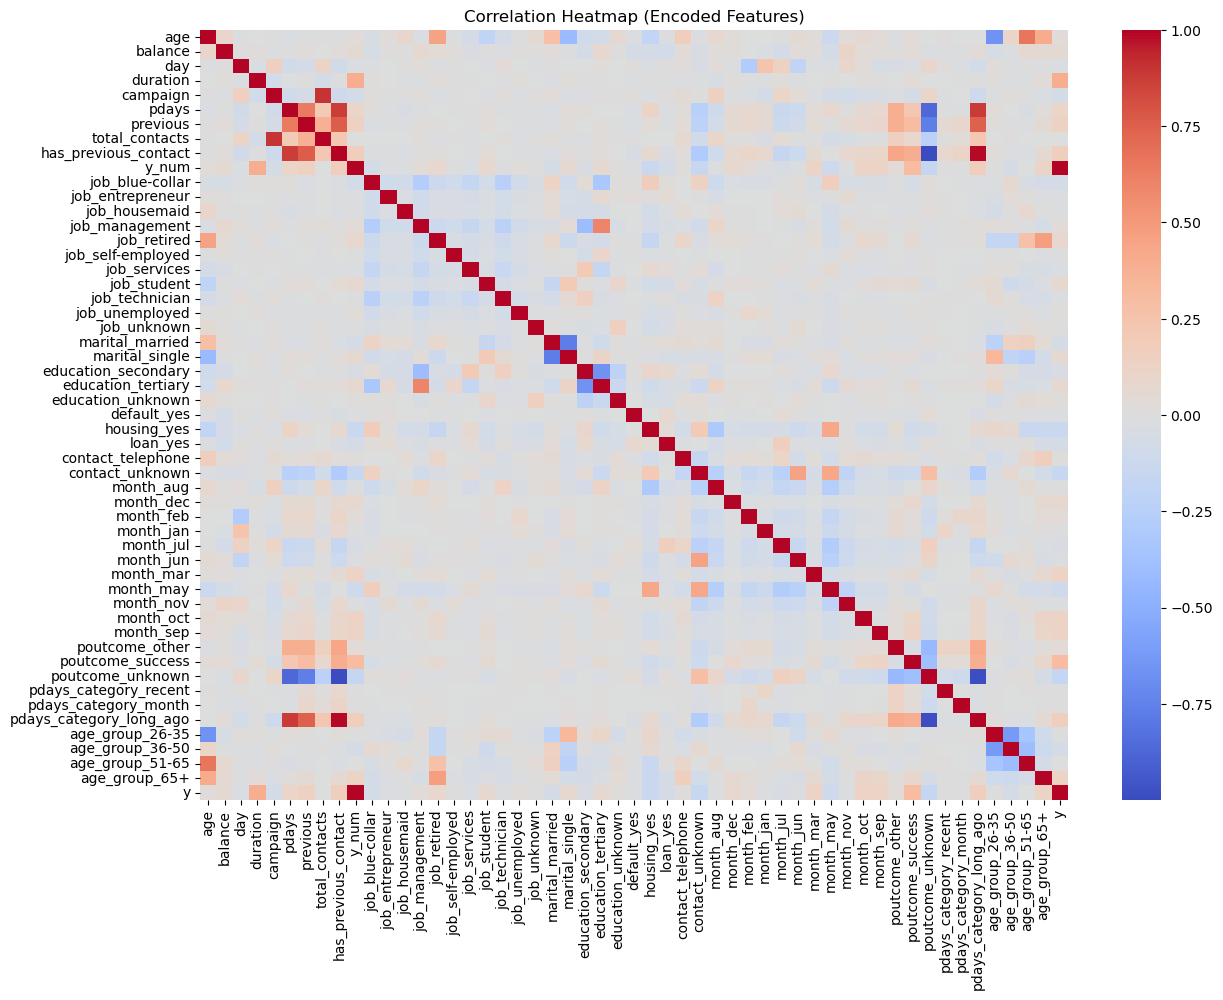

In [59]:
df_encoded = pd.get_dummies(df.drop(columns=['y']), drop_first=True)
df_encoded['y'] = df['y'].map({'yes':1, 'no':0})

corr = df_encoded.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Encoded Features)')
plt.show()
